# EE_8115_2 Electrical Engineering LAB

## STUDENT GROUP: [fill in, e.g. XX]

**Complete the following list of students of your group!**

* Student 1: Name, Mat. No.
* Student 2: Name, Mat. No.
* Student 3: Name, Mat. No. 


# Experiment 1 - LDR Model Determination

- University: Rhein-Waal University of Applied Sciences (Hochschule Rhein-Waal)
- Course:  EE_8115 Physics: Mechanics, Electricity and Magentism, WS2024/25

## Overview
---

The following lab exercise aims to profile the characteristic curve of an LDR with respect to the illuminance.

## Background Preparation Before Starting the Lab
---

If you have not done yet, go to **[EEng Lab Course Preparation](https://github.com/rolfbecker/EE_8115_2_EEng_LAB_WS2024/tree/main/EEng_LAB_Course_Preparation)** to set up your Python work environment based on **Jupyter Lab**.


## Safety Considerations
---

- **DO NOT** energize **ANY** circuit without prior review by the lab assistants, thay will make sure that the circuit is correctly connected, and if not, the will point out the necessary corrections.
- **DO NOT** drop or hit **ANY** components, especially measuring instruments such as the multimeter, Luxmeter, etc.
- For this specific exercise (*LDR Curve Profiling*), **DO NOT TOUCH** the bulb **during or after** use as it may be hot!!.

<center>
    <img src="./images/safety-bulb.png" width="400px"/>
    <br>
    <i></i>
</center>

## List of Equipment
---

**Make sure you have all the components and instruments listed below before you start**.

Components:
- 1x Breadboard
- 1x LDR
- 1x 10K Ohm Resistor
- 1x Arduino UNO with cable
- Set of jumper cables
- 1x light bulb
- 1x Ceramic socket with dimmer attached
- 1x Stand/Holder

Instruments:
- 1x Multimeter
- 1x Luxmeter

## Circuit
---

The diagrams below show the test circuit you must make for this exercise. In this diagram there are three connections:
- Vcc 5V (from Arduino UNO)
- GND (from Arduino UNO)
- Analog Pin A5 (this connection is optional)

<div style="display: flex;">
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
        <img src="./images/LDR-schem.png" width="400px"/>
        <br>
        <i>LDR test circuit. Schematic representation</i>
      </center>
  </div>
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
    <img src="./images/LDR-bb.png" width="400px"/>
    <br>
    <i>LDR test circuit. Breadboard representation</i>
      </center>
  </div>
</div>

## Setup
---

The recommended placement of the components and measuring instruments is shown in the following image:

<center>
    <img src="./images/LDR-setup.png" width="600px"/>
    <br>
    <i></i>
</center>

## Placement
---

1. Position the stand with the light bulb at a height of approximately 70 cm with respect to the base.

<center>
    <img src="./images/stand.png"/>
    <br>
    <i></i>
</center>

2. Place the LDR and the photoreceptor on the base, making sure that they receive the same amount of light.

> Note: Keep the area free of shadows and the lighting in the room consistent. For this experiment it is recommended to position the base in the direction of the window so that both devices (LDR and Photoreceptor) are uniformly affected by the outside light.

<center>
    <img src="./images/ldr-luxmeter-light.png" width="500px"/>
    <br>
    <i></i>
</center>

3. Add the multimeter test probes to measure the voltage across the **10K** resistor.

<center>
    <img src="./images/measurement-points.jpg" width="500px"/>
    <br>
    <i></i>
</center>

## Data Capture
---

The data capture is performed **manually by yourself**. The data must be entered in a text file with extension `.txt` inside the `data` folder. Please follow the format of the `test.txt` file inside the `data` folder.

An example of how the file should be formatted:
```
Ev,DV1
101,1.466
256,2.24
470,2.74
```

The first column of data corresponds to the **Illuminance** $E_v$ measured in **Lux**, and the second column is the **voltage across the 10K resistor**.

**Use the following file: [myOwnData.txt](./data/myOwnData.txt)**

> Note: Keep the area **free of shadows** and maintain constant lighting in the room. For this experiment, it is recommended to **orient the setup** towards the window to ensure that **both the LDR and the Lux-Meter are uniformly affected** by ambient light.

**BEFORE** starting the measurements make sure that the light intensity is at **MINIMUM value**. This can be done by using the dimmer attached to the socket cable.

<center>
    <img src="./images/dimmer.jpg" width="400px"/>
    <br>
    <i>Dimmer: Is used to adjust the intensity of light emitted by the light bulb.</i>
</center>

___

Taking into account all of the above considerations, proceed to the following **Measurement procedures:**
1. Take the value displayed by the Luxmeter and the voltage across resistance and add it to the `.txt` file. Example:

<code style="margin: 10px 30px; display: block; color: grey; padding: 1em 2em ;">Ev,DV1
101,1.466
</code>

2. (without changing anything in the setup) **INCREASE** the light intensity and add the new values to the `.txt` file.

<code style="margin: 10px 30px; display: block; color: grey; padding: 1em 2em ;">Ev,DV1
101,1.466
256,2.24
</code>

3. Repeat the above steps until you reach the **MAXIMUM INTENSITY** of the light bulb.

4. When the maximum intensity allowed by the bulb is reached, **decrease** it to the **MINIMUM INTENSITY** and **move the bulb closer to the base** until the amount of **lux is close to the last measurement**. Example:

<center>
    <img src="./images/stand-2.png"/>
    <br>
    <i>The number shown in this image is for <b>REFERENCE ONLY</b> and each team should adjust the height to their needs.</i>
</center>

5. With the height of the bulb adjusted; proceed with steps 1 and 2 until reaches maximum intensity (step 3).

> Note: Due to the heat emitted by the light bulb, **DO NOT place it closer than 20 cm from the base**.

## Data Display

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive

**LDR Model:**

The behavior of an LDR can be approximated using the following power function:

$ R_{\text{LDR}}(x) = b \cdot x^m $

where **$x$** represents the **illuminance** in units of **Lux**. $ R $ is measured in ohms ($\Omega$). In this model, $ b $ and $ m $ are shape parameters. 



The function implemented in Python:

In [23]:
def LDRmodel(lux, m=-0.57, b=2.71e4):
    return b*lux**m

### Plot the voltage drop across the resistor $R_1$

**Fill in the requested information and MEASURED data for futher analysis!**

In [89]:
############################
# Fill these variables with
# the requested information
############################

# MEASURE the voltage provided by the Arduino +5V pin. It is usually not exactly +5V.  

V0 = 5.04 # Output voltage produced by the Arduino UNO. Fill in your measured value.

R1 = 10e3 # MEASURED Resistor value (10K in this case). Fill in your measured value.

FILE_NAME = "myOwnData.txt"  # The data file you used above to fill in your measurements


In [90]:
############################
# You do NOT need to change 
# anything in the section below
############################

FILE_PATH = f"./data/{FILE_NAME}"

df = pd.read_csv(FILE_PATH)
df.set_index("Ev", inplace = True)
df.head()

,DV1
Ev,
101,1.466
256,2.240
470,2.740
606,2.940
850,3.190


In [91]:
df = df.sort_values('DV1')

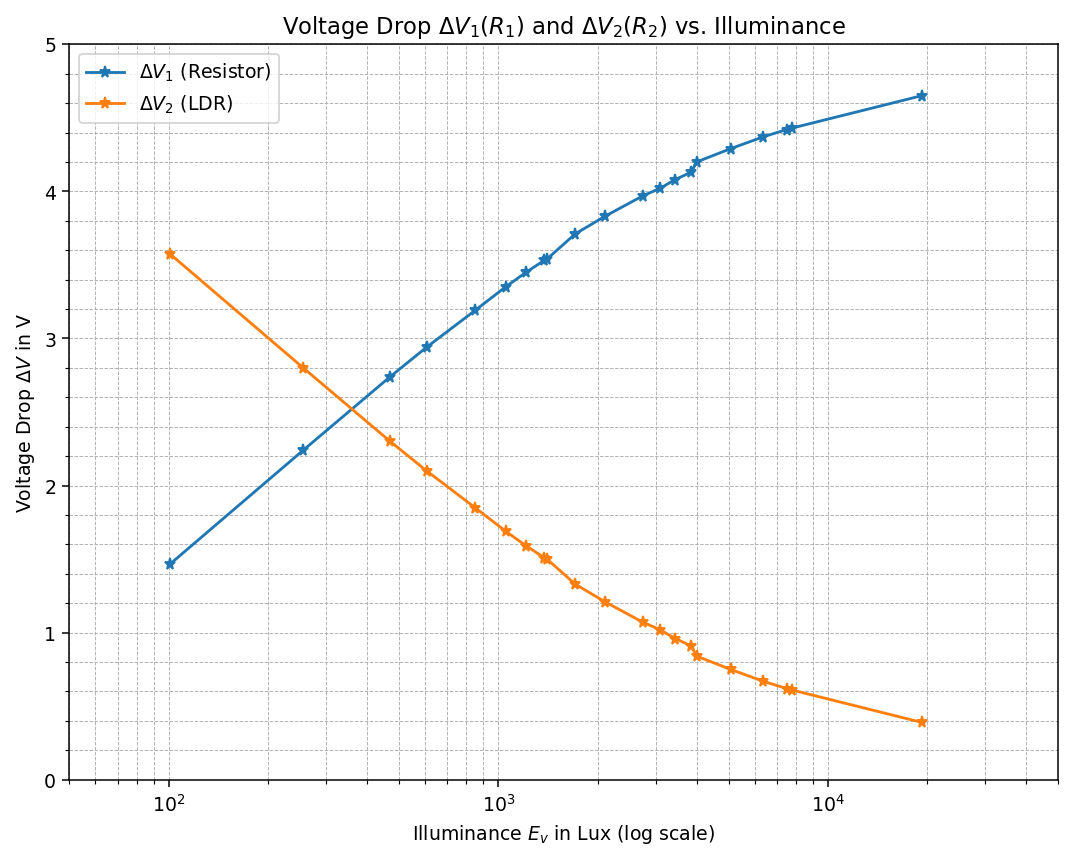

In [92]:
# DV1: Delta V1, the voltage drop across resistor R1
DV1 = df["DV1"] 

# DV2: Delta V2, the voltage drop across resistor R2 (LDR)
DV2 = V0 - DV1

lux = df.index

fig1,ax1 = plt.subplots(figsize=(8,6), dpi=136)
fig1.tight_layout()

# Use plot instead of loglog to keep y-axis linear
ax1.plot(lux, DV1, "*-",  label = "$\Delta V_1$ (Resistor)")
ax1.plot(lux, DV2,  "*-", label = "$\Delta V_2$ (LDR)")

# Set x-axis to logarithmic scale
ax1.set_xscale('log')

ax1.set_title("Voltage Drop $\Delta V_1(R_1)$ and $\Delta V_2(R_2)$ vs. Illuminance")
ax1.set_xlabel("Illuminance $E_v$ in Lux (log scale)")
ax1.set_ylabel("Voltage Drop $\Delta V$ in V")
ax1.set_ylim(0,5)
ax1.set_xlim(50,50000)

# Enable minor ticks and grid lines
ax1.minorticks_on()
ax1.grid(which='both', linestyle='--', linewidth=0.5)

ax1.legend()

plt.show()


In [93]:
def plotter1(m=-0.67, b=520.e3): # parameters with initial values
     
    DV2 = V0-DV1
    LDR = DV2/DV1*R1

    fig2,ax2 = plt.subplots(figsize=(8,8))
    
    ax2.set_xlim(5e1,5e4)
    ax2.set_ylim(5e1,5e4)
    ax2.minorticks_on()
    ax2.grid(which='both', linestyle='--', linewidth=0.5)
    
    ax2.loglog(lux, LDR, "*")
    ax2.loglog(lux, LDRmodel(lux,m,b), "-")
    ax2.set_title("Illuminance vs Resistence log-log-plot")
    ax2.set_xlabel("Illuminance ($E_v$) in lux")
    ax2.set_ylabel("LDR resistance ($R$)")
    
    ax2.grid(True)

In [87]:
# initialize the interactive plot
iplot1 = interactive(
    plotter1, 
#    V0=(0.,10.,0.1),
#    R1=(5000.,15000.,100.),
    m=(-0.8,-0.2,0.01),
    b=(100000., 1000000., 10000.)
)

# start the interactive plot
iplot1

interactive(children=(FloatSlider(value=-0.67, description='m', max=-0.2, min=-0.8, step=0.01), FloatSlider(va…

## Questions


**Question 1:**<br>

The light-dependent resistance of an LDR (Light Dependent Resistor) can be modeled using a power function:

$$ R_{\text{LDR}}(x) = b \cdot x^m $$

where **$x$** is  **illuminance** in units of **Lux**.

**Show** that this function produces a **linear graph** on a **log-log scale**. Note that "log-log scale" means that both $R_{\text{LDR}}$ and $x$ are plotted with logarithmic axis scaling.


**Answer 1:** <br>
your text ...

---
**Question 2:**<br>
Describe the **distinct physical principles** that govern the operation of a **photoresistor (LDR)** and a **photodiode**.

**Answer 2:**<br>
your text...

---
**Question 3:**<br>
Based on your measurements, what are the values for $b$ and $m$ that fit your data best? How are they related to **slope** and **y-intercept**?

**Answer 3:**<br>
your text ...

---
**Question 4:**<br>
Due to production processes, LDRs exhibit significant variation between different specimens. What would be the outcome if you **repeated the experiment**, but this time **replaced the photoresistor** with another one of the **same brand?**

**Answer 4:**<br>
your text ...

---
**Question 5:**<br>
**Compare your LDR model** with the results of **another student group** of your choice. Which student group do you use data from? **Name the student group!** Use the other student group's $m$ and $b$ values in your interactive model fit above. What do you observe? 

**Answer 5:**<br>
your text...